In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('health.csv')
df.columns = ["date", "click"]
df

,date,click
0,2019-01-01,36
1,2019-01-02,45
2,2019-01-03,41
3,2019-01-04,40
4,2019-01-05,40
...,...,...
360,2019-12-27,86
361,2019-12-28,80
362,2019-12-29,87
363,2019-12-30,88


In [3]:
df =df.set_index('date')
df

,click
date,
2019-01-01,36
2019-01-02,45
2019-01-03,41
2019-01-04,40
2019-01-05,40
...,...
2019-12-27,86
2019-12-28,80
2019-12-29,87


In [5]:
print(type(df.index))
df.index= pd.to_datetime(df.index)
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [6]:
df.index[1]-df.index[0]

Timedelta('1 days 00:00:00')

In [7]:
import matplotlib.pyplot as plt

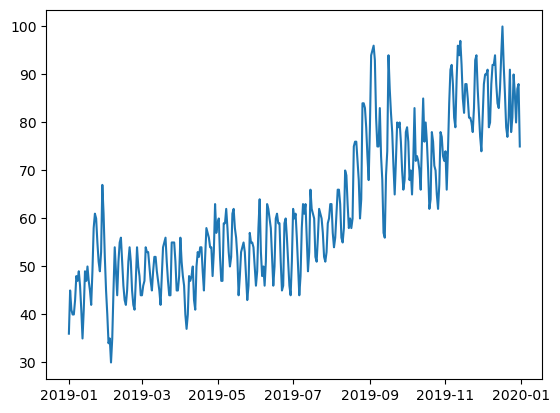

In [8]:
plt.plot(df.index, df['click'])

In [15]:
season = 7 
trend = []
for i in range (len(df['click'])):
    trend.append(np.mean(df['click'][i-(season//2):(i+1+(season//2))]))
    
for i in range(season//2):
    trend[(i+1)*(-1)] = np.nan

In [16]:
trend

[nan,
 nan,
 nan,
 41.857142857142854,
 43.42857142857143,
 44.0,
 44.714285714285715,
 44.857142857142854,
 44.142857142857146,
 43.857142857142854,
 44.0,
 44.0,
 44.142857142857146,
 44.285714285714285,
 44.857142857142854,
 45.857142857142854,
 47.0,
 48.285714285714285,
 50.285714285714285,
 51.714285714285715,
 52.857142857142854,
 53.714285714285715,
 54.714285714285715,
 55.285714285714285,
 56.57142857142857,
 56.57142857142857,
 55.42857142857143,
 54.0,
 52.42857142857143,
 50.285714285714285,
 47.714285714285715,
 42.42857142857143,
 38.714285714285715,
 37.714285714285715,
 39.0,
 40.285714285714285,
 41.714285714285715,
 44.0,
 47.57142857142857,
 50.57142857142857,
 51.42857142857143,
 50.285714285714285,
 49.42857142857143,
 49.142857142857146,
 48.285714285714285,
 47.714285714285715,
 47.42857142857143,
 47.42857142857143,
 47.285714285714285,
 47.142857142857146,
 47.0,
 47.285714285714285,
 47.714285714285715,
 47.142857142857146,
 46.714285714285715,
 46.5714285714

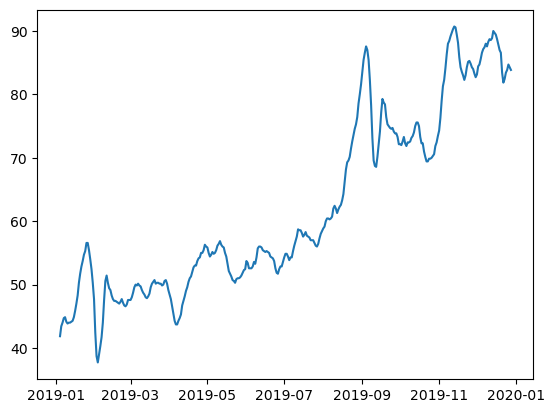

In [17]:
plt.plot(df.index, trend)

In [19]:
detrend = []
for a, i in enumerate(df['click']):
    detrend.append(i - trend[a])
detrend 

[nan,
 nan,
 nan,
 -1.857142857142854,
 -3.4285714285714306,
 -1.0,
 3.2857142857142847,
 2.142857142857146,
 4.857142857142854,
 2.142857142857146,
 -3.0,
 -9.0,
 -3.142857142857146,
 4.714285714285715,
 2.142857142857146,
 4.142857142857146,
 0.0,
 -3.2857142857142847,
 -8.285714285714285,
 -2.7142857142857153,
 5.142857142857146,
 7.285714285714285,
 5.285714285714285,
 -0.2857142857142847,
 -5.571428571428569,
 -7.571428571428569,
 -2.4285714285714306,
 13.0,
 8.57142857142857,
 1.7142857142857153,
 -2.7142857142857153,
 -2.4285714285714306,
 -4.714285714285715,
 -2.7142857142857153,
 -9.0,
 -5.285714285714285,
 3.2857142857142847,
 10.0,
 1.4285714285714306,
 -6.571428571428569,
 -0.4285714285714306,
 4.714285714285715,
 6.571428571428569,
 1.857142857142854,
 -2.2857142857142847,
 -4.714285714285715,
 -5.428571428571431,
 -2.4285714285714306,
 3.7142857142857153,
 6.857142857142854,
 4.0,
 -2.2857142857142847,
 -5.714285714285715,
 -6.142857142857146,
 0.2857142857142847,
 7.4285

In [45]:
seasonal = []
for i in range(season):
    imsi = []
    for w in detrend[i::season]:
        if np.isnan(w) == False:
            imsi.append(w)
        else:
            pass
        seasonal.append(np.mean(imsi))
seasonal

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[nan,
 2.142857142857146,
 2.142857142857146,
 3.857142857142859,
 5.0357142857142865,
 2.9714285714285724,
 3.5714285714285716,
 4.040816326530612,
 3.928571428571429,
 3.8253968253968256,
 3.8,
 3.87012987012987,
 3.9761904761904763,
 3.923076923076923,
 3.806122448979592,
 3.657142857142857,
 3.633928571428571,
 3.478991596638655,
 3.507936507936508,
 3.646616541353383,
 3.6285714285714277,
 3.6258503401360533,
 3.98051948051948,
 4.0683229813664585,
 4.142857142857142,
 4.3028571428571425,
 4.335164835164834,
 4.428571428571428,
 4.428571428571428,
 4.413793103448276,
 4.333333333333333,
 4.377880184331797,
 4.464285714285714,
 4.532467532467532,
 4.655462184873949,
 4.763265306122449,
 4.726190476190477,
 4.806949806949808,
 4.7969924812030085,
 4.849816849816851,
 4.717857142857143,
 4.613240418118467,
 4.659863945578231,
 4.67109634551495,
 4.762987012987012,
 4.73968253968254,
 4.667701863354037,
 4.762917933130699,
 4.773809523809523,
 4.752186588921282,
 4.882857142857143,
 4

ValueError: x and y must have same first dimension, but have shapes (7,) and (365,)

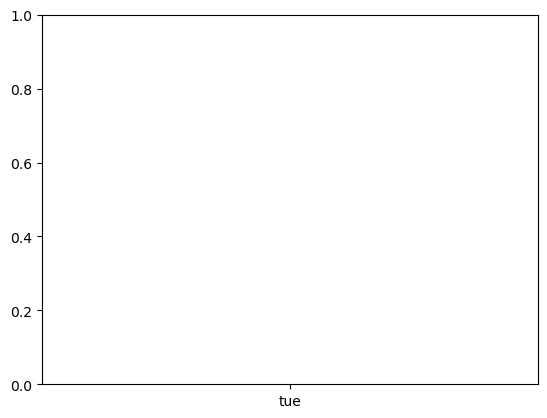

In [30]:
plt.plot(['tue','wed','thu','fri','sat','sun','mon'],seasonal)

In [38]:
seasonal_subtract = []
for i in range(len(detrend)//len(seasonal)):
    for w in  seasonal:
        seasonal_subtract.append(w)
for i in seasonal[:len(detrend)%len(seasonal)]:
        seasonal_subtract.append(i)
seasonal_subtract        

[nan,
 2.142857142857146,
 2.142857142857146,
 3.857142857142859,
 5.0357142857142865,
 2.9714285714285724,
 3.5714285714285716,
 4.040816326530612,
 3.928571428571429,
 3.8253968253968256,
 3.8,
 3.87012987012987,
 3.9761904761904763,
 3.923076923076923,
 3.806122448979592,
 3.657142857142857,
 3.633928571428571,
 3.478991596638655,
 3.507936507936508,
 3.646616541353383,
 3.6285714285714277,
 3.6258503401360533,
 3.98051948051948,
 4.0683229813664585,
 4.142857142857142,
 4.3028571428571425,
 4.335164835164834,
 4.428571428571428,
 4.428571428571428,
 4.413793103448276,
 4.333333333333333,
 4.377880184331797,
 4.464285714285714,
 4.532467532467532,
 4.655462184873949,
 4.763265306122449,
 4.726190476190477,
 4.806949806949808,
 4.7969924812030085,
 4.849816849816851,
 4.717857142857143,
 4.613240418118467,
 4.659863945578231,
 4.67109634551495,
 4.762987012987012,
 4.73968253968254,
 4.667701863354037,
 4.762917933130699,
 4.773809523809523,
 4.752186588921282,
 4.882857142857143,
 4

In [43]:
residual = []
for a, i in enumerate(seasonal_subtract):
    residual.append(detrend[a] - i)
residual

[nan,
 nan,
 nan,
 -5.7142857142857135,
 -8.464285714285717,
 -3.9714285714285724,
 -0.2857142857142869,
 -1.897959183673466,
 0.9285714285714253,
 -1.6825396825396797,
 -6.8,
 -12.870129870129869,
 -7.119047619047622,
 0.7912087912087924,
 -1.663265306122446,
 0.4857142857142889,
 -3.633928571428571,
 -6.76470588235294,
 -11.793650793650793,
 -6.360902255639099,
 1.5142857142857182,
 3.6598639455782314,
 1.3051948051948048,
 -4.354037267080743,
 -9.714285714285712,
 -11.874285714285712,
 -6.763736263736265,
 8.571428571428573,
 4.1428571428571415,
 -2.6995073891625605,
 -7.047619047619048,
 -6.806451612903228,
 -9.17857142857143,
 -7.246753246753247,
 -13.655462184873949,
 -10.048979591836734,
 -1.4404761904761925,
 5.193050193050192,
 -3.368421052631578,
 -11.42124542124542,
 -5.146428571428574,
 0.10104529616724811,
 1.911564625850338,
 -2.8139534883720962,
 -7.048701298701297,
 -9.453968253968256,
 -10.096273291925467,
 -7.191489361702129,
 -1.0595238095238075,
 2.1049562682215717,

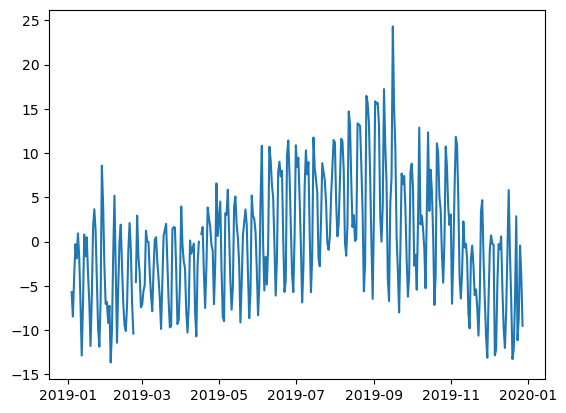

In [44]:
plt.plot(df.index, residual)